<a href="https://colab.research.google.com/github/jjuandiego099/cuadernos-y-proyectos-IA/blob/main/Cuaderno_5_Creaci%C3%B3n_de_Nuevas_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 5: Creación de Nuevas Características
La creación de nuevas características (feature engineering) es un paso crucial en el preprocesamiento de datos, ya que puede mejorar la capacidad predictiva de los modelos al transformar y combinar los datos originales. En este Sesion, exploraremos estrategias para crear características basadas en datos existentes y ejemplos prácticos para cada caso.


---

## <font color="red">5.1 Combinación y Transformación de Características Existentes
La combinación de características implica usar variables existentes para generar nuevas que reflejen relaciones entre ellas.
### Ejemplo: Crear una relación entre dos columnas


In [1]:
import pandas as pd

# Dataset de ejemplo
data = pd.DataFrame({
    "Precio": [100, 200, 150, 300],
    "Cantidad": [2, 5, 3, 8]
})

# Crear una nueva característica: Total
data["Total"] = data["Precio"] * data["Cantidad"]
print("Datos con nueva característica:\n", data)


Datos con nueva característica:
    Precio  Cantidad  Total
0     100         2    200
1     200         5   1000
2     150         3    450
3     300         8   2400


## <font color="red">5.2 Generación de Características Temporales
Los datos con marcas de tiempo pueden enriquecerse extrayendo información útil como año, mes, día, hora o día de la semana.
### Ejemplo: Procesamiento de características temporales


In [3]:
# Agregar fechas al dataset
data["Fecha"] = pd.to_datetime(["2023-01-01", "2023-01-15", "2023-02-10", "2023-03-01"])

# Extraer características temporales
data["Año"] = data["Fecha"].dt.year
data["Mes"] = data["Fecha"].dt.month
data["Día"] = data["Fecha"].dt.day
data["Día_Semana"] = data["Fecha"].dt.day_name()
print("Datos con características temporales:\n", data)


Datos con características temporales:
    Precio  Cantidad  Total      Fecha   Año  Mes  Día Día_Semana
0     100         2    200 2023-01-01  2023    1    1     Sunday
1     200         5   1000 2023-01-15  2023    1   15     Sunday
2     150         3    450 2023-02-10  2023    2   10     Friday
3     300         8   2400 2023-03-01  2023    3    1  Wednesday


## <font color="red">5.3 Extracción de Características a partir de Texto
El procesamiento de texto permite transformar datos no estructurados en representaciones numéricas útiles.
### <font color="blue">5.3.1 Tokenización y Conteo de Palabras
La tokenización divide el texto en palabras o frases, y el conteo de palabras mide la frecuencia de términos en un texto.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Datos de texto
data_texto = pd.DataFrame({
    "Texto": ["Hola mundo", "Machine learning es increíble", "Python es popular"]
})

# Vectorizador de palabras
vectorizer = CountVectorizer()
matriz_frecuencia = vectorizer.fit_transform(data_texto["Texto"])

# Mostrar el vocabulario y la matriz
print("\nVocabulario:", vectorizer.get_feature_names_out())
print("Matriz de frecuencia:\n", matriz_frecuencia.toarray())



Vocabulario: ['es' 'hola' 'increíble' 'learning' 'machine' 'mundo' 'popular' 'python']
Matriz de frecuencia:
 [[0 1 0 0 0 1 0 0]
 [1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 1]]


## <font color="red">5.4 Extracción de Características Geoespaciales
Los datos geoespaciales pueden enriquecerse mediante cálculos como distancias, regiones o agrupaciones espaciales.
### Ejemplo: Distancia entre coordenadas
Utilizamos la fórmula de Haversine para calcular la distancia entre dos puntos geográficos.


In [5]:
from geopy.distance import geodesic


# Coordenadas de dos ubicaciones
data_geo = pd.DataFrame({
    "Latitud": [19.4326, 40.7128],  # Ciudad de México, Nueva York
    "Longitud": [-99.1332, -74.0060]
})


# Calcular distancias desde un punto de referencia
referencia = (19.4326, -99.1332)  # Ciudad de México
data_geo["Distancia_km"] = data_geo.apply(
    lambda row: geodesic(referencia, (row["Latitud"], row["Longitud"])).kilometers, axis=1
)
print("\nDatos con distancia geoespacial:\n", data_geo)


Datos con distancia geoespacial:
    Latitud  Longitud  Distancia_km
0  19.4326  -99.1332        0.0000
1  40.7128  -74.0060     3357.6952


In [10]:
# prompt: crear un dataframe  con edad latitud longitud nombre en torno a bucaramanga y con la nota en ia de 1 a 5

import pandas as pd
import numpy as np
from geopy.distance import geodesic

# Número de registros
n = 100

# Crear datos aleatorios
nombres = ['Nombre' + str(i) for i in range(n)]
edades = np.random.randint(18, 65, n)
latitudes = np.random.uniform(7.05, 7.20, n) # Alrededor de Bucaramanga
longitudes = np.random.uniform(-73.15, -73.00, n) # Alrededor de Bucaramanga
notas_ia = np.random.randint(1, 6, n)

# Crear DataFrame
df = pd.DataFrame({
    'nombre': nombres,
    'edad': edades,
    'latitud': latitudes,
    'longitud': longitudes,
    'nota_ia': notas_ia
})

# Punto de referencia (Bucaramanga)
bucaramanga = (7.1253, -73.1184)

# Calcular la distancia a Bucaramanga
df['distancia_bucaramanga'] = df.apply(lambda row: geodesic(bucaramanga, (row['latitud'], row['longitud'])).km, axis=1)

print(df.head())


    nombre  edad   latitud   longitud  nota_ia  distancia_bucaramanga
0  Nombre0    22  7.181219 -73.019832        5              12.521445
1  Nombre1    62  7.145552 -73.115745        1               2.258798
2  Nombre2    49  7.110875 -73.062360        1               6.392818
3  Nombre3    55  7.127339 -73.094075        5               2.696465
4  Nombre4    50  7.126139 -73.056910        5               6.793128


In [12]:
# prompt: crea un grafico de mapa con scatter_mapbox

import plotly.express as px

# Suponiendo que 'df' ya está definido como en el código anterior
fig = px.scatter_mapbox(df, lat="latitud", lon="longitud", hover_name="nombre", hover_data=["edad", "nota_ia", "distancia_bucaramanga"],
                        color="nota_ia", size="distancia_bucaramanga", zoom=10, height=600,
                        mapbox_style="open-street-map")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [15]:
# prompt: calcula la distancia desde este punto de referencia 7.11711, -73.10501 agrega esta columna al df y elimina latitud y longitud

# Punto de referencia
referencia = (7.11711, -73.10501)

# Calcular la distancia al punto de referencia
df['distancia_referencia'] = df.apply(lambda row: geodesic(referencia, (row['latitud'], row['longitud'])).km, axis=1)

# Eliminar columnas 'latitud' y 'longitud'
df = df.drop(['latitud', 'longitud'], axis=1)

print(df.head())


    nombre  edad  nota_ia  distancia_bucaramanga  distancia_referencia
0  Nombre0    22        5              12.521445             11.780995
1  Nombre1    62        1               2.258798              3.361551
2  Nombre2    49        1               6.392818              4.761647
3  Nombre3    55        5               2.696465              1.654883
4  Nombre4    50        5               6.793128              5.406427


## <font color="red">5.5 Visualización de Nuevas Características
### <font color="blue">5.5.1 Gráfico de características temporales y relaciones


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Total por Mes
sns.barplot(x="Mes", y="Total", data=data)
plt.title("Total de Ventas por Mes")
plt.show()


ValueError: Could not interpret value `Mes` for `x`. An entry with this name does not appear in `data`.

### <font color="blue">5.5.2 Gráfico de distribución geoespacial


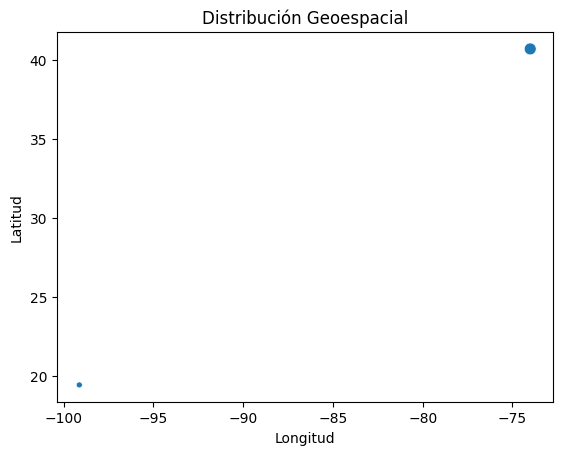

In [ ]:
# Gráfico de puntos geográficos
sns.scatterplot(x="Longitud", y="Latitud", size="Distancia_km", data=data_geo, legend=False)
plt.title("Distribución Geoespacial")
plt.show()
